In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
# reference:
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3059453/
# http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Survival/BS704_Survival5.html

In [261]:
samplesize = 2000
dimension = 1

In [262]:
def getrandom(upper):
    return random.uniform(0,upper)

In [391]:
table1_time = list(map(int,np.random.exponential(60,size=[dimension,samplesize]).T))
table2_time = list(map(int,np.random.exponential(65,size=[dimension,samplesize]).T))

In [392]:
# table1

In [393]:
table1_time = list(set(table1_time))[:100]
table2_time = list(set(table2_time))[:100]

In [394]:
# table1_risk = list(map(int,np.random.exponential(30,size=[dimension,samplesize]).T))
# table2_risk = list(map(int,np.random.exponential(35,size=[dimension,samplesize]).T))
# table1_risk = list(set(table1_risk))[:100]
# table2_risk = list(set(table2_risk))[:100]

In [395]:
table1_risk = np.random.randint(low=1,high=25,size=100,dtype='int')
table2_risk = np.random.randint(low=1,high=25,size=100,dtype='int')

In [396]:
len(set(table1_risk))

23

In [397]:
len(set(table2_risk))

24

In [398]:
len(set(table1_time))

100

In [399]:
len(set(table2_time))

100

In [400]:
table1 = {'Time':table1_time,
         'DG1':[],
         'NG1':table1_risk}
table2 = {'Time':table2_time,
         'DG2':[],
         'NG2':table2_risk}

In [401]:
table1_death = []
table2_death = []
for i in range(len(table1_time)):
    prob = getrandom(.2)
    if(prob < 0.10):
        table1_death.append(int(getrandom(table1_risk[i])))
    else:
        table1_death.append(0) 
        
for i in range(len(table2_time)):
    prob = getrandom(.2)
    if(prob < 0.10):
        table2_death.append(int(getrandom(table2_risk[i])))
    else:
        table2_death.append(0)

In [402]:
table1['DG1'] = table1_death
table2['DG2'] = table2_death

In [403]:
table1 = pd.DataFrame(table1)
table2 = pd.DataFrame(table2)

In [404]:
table1.head(20)

,Time,DG1,NG1
0,0,0,20
1,1,0,2
2,2,8,22
3,3,1,2
4,4,0,12
5,5,0,21
6,6,9,16
7,7,0,1
8,8,9,13
9,9,0,3


In [405]:
table3 = {'Time':[],
         'N1':[],
          'N2':[],
          'N':[],
          'O1':[],
          'O2':[],
          'O':[]
         }
i = 0
j = 0
data1 = np.array(table1)
data2 = np.array(table2)
index = 0
while(i < len(data1) and j < len(data2)):
    if(data1[i][0] < data2[j][0]):
        table3['N1'].append(data1[i][2])
        table3['N2'].append(0)
        table3['O1'].append(data1[i][1])
        table3['O2'].append(0)
        table3['Time'].append(data1[i][0])
        i+=1
    elif(data1[i][0] > data2[j][0]):
        table3['N2'].append(data2[j][2])
        table3['N1'].append(0)
        table3['O2'].append(data2[j][1])
        table3['O1'].append(0)
        table3['Time'].append(data2[j][0])
        j+=1
    else:
        table3['N1'].append(data1[i][2])
        table3['O1'].append(data1[i][1])
        table3['Time'].append(data1[i][0])
        table3['N2'].append(data2[j][2])
        table3['O2'].append(data2[j][1])
        j+=1
        i+=1
    table3['O'].append(table3['O1'][index] + table3['O2'][index])
    table3['N'].append(table3['N1'][index] + table3['N2'][index])
    index +=1
while(i < len(data1)):
    table3['N1'].append(data1[i][2])
    table3['N2'].append(0)
    table3['O1'].append(data1[i][1])
    table3['O2'].append(0)
    table3['Time'].append(data1[i][0])
    table3['O'].append(table3['O1'][index] + table3['O2'][index])
    table3['N'].append(table3['N1'][index] + table3['N2'][index])
    index +=1
    i+=1
while(j < len(data2)):
    table3['N2'].append(data2[j][2])
    table3['N1'].append(0)
    table3['O2'].append(data2[j][1])
    table3['O1'].append(0)
    table3['Time'].append(data2[j][0])
    table3['O'].append(table3['O1'][index] + table3['O2'][index])
    table3['N'].append(table3['N1'][index] + table3['N2'][index])
    index +=1
    j+=1

In [406]:
table3d = pd.DataFrame(table3)

In [407]:
# table3df.head(50)

In [408]:
table3d.head()

,Time,N1,N2,N,O1,O2,O
0,0,20,18,38,0,7,7
1,1,2,12,14,0,7,7
2,2,22,5,27,8,1,9
3,3,2,22,24,1,6,7
4,4,12,19,31,0,13,13


In [409]:
table3d.head(50)

,Time,N1,N2,N,O1,O2,O
0,0,20,18,38,0,7,7
1,1,2,12,14,0,7,7
2,2,22,5,27,8,1,9
3,3,2,22,24,1,6,7
4,4,12,19,31,0,13,13
5,5,21,23,44,0,0,0
6,6,16,7,23,9,4,13
7,7,1,21,22,0,0,0
8,8,13,14,27,9,0,9
9,9,3,8,11,0,5,5


In [410]:
def getsurvival(risk,death,initialval = 1.0):
    risk = np.array(risk)
    death = np.array(death)
    survival = []
    survival.append(initialval)
    index = 1
    for i in range(1,len(risk)):
        tmp1 = survival[i-1] * ((risk[i] - death[i])/risk[i])
        survival.append(tmp1)
    return survival
def getexpectedevents(n1,o,n):
    events = []
    for i in range(len(n1)):
        events.append(n1[i] * (o[i]/n[i]))
    return events

In [411]:
table3d['Expected1'] = getexpectedevents(n=table3d['N'],o=table3d['O'],n1=table3d['N1'])
table3d['Expected2'] = getexpectedevents(n=table3d['N'],o=table3d['O'],n1=table3d['N2'])

In [412]:
table3d.head(20)

,Time,N1,N2,N,O1,O2,O,Expected1,Expected2
0,0,20,18,38,0,7,7,3.684211,3.315789
1,1,2,12,14,0,7,7,1.000000,6.000000
2,2,22,5,27,8,1,9,7.333333,1.666667
3,3,2,22,24,1,6,7,0.583333,6.416667
4,4,12,19,31,0,13,13,5.032258,7.967742
5,5,21,23,44,0,0,0,0.000000,0.000000
6,6,16,7,23,9,4,13,9.043478,3.956522
7,7,1,21,22,0,0,0,0.000000,0.000000
8,8,13,14,27,9,0,9,4.333333,4.666667
9,9,3,8,11,0,5,5,1.363636,3.636364


In [413]:
sums= table3d.sum()

In [414]:
sums

Time         4950.000000
N1           1249.000000
N2           1215.000000
N            2464.000000
O1            301.000000
O2            270.000000
O             571.000000
Expected1     303.524853
Expected2     267.475147
dtype: float64

In [415]:
X1 = ((sums['O1'] - sums['Expected1']) **2)/(sums['Expected1'])
X2 = ((sums['O2'] - sums['Expected2']) **2)/(sums['Expected2'])
X = X1 + X2

In [416]:
print (X)

0.04483640136464777


In [417]:
def kmplot(time,survival,title=""):
    plt.plot(time,survival)
    plt.xlabel("Time")
    
    plt.title("Time vs Survival Curve "+title)
    
    plt.ylabel("Survival Property")
#     plt.scatter(time,survival)
    plt.legend()
    

In [418]:
table1['Survival_G1'] = getsurvival(risk=table1['NG1'],death=table1['DG1'])
table2['Survival_G2'] = getsurvival(risk=table2['NG2'],death=table2['DG2'])

In [419]:
# table1['Survival_G1']

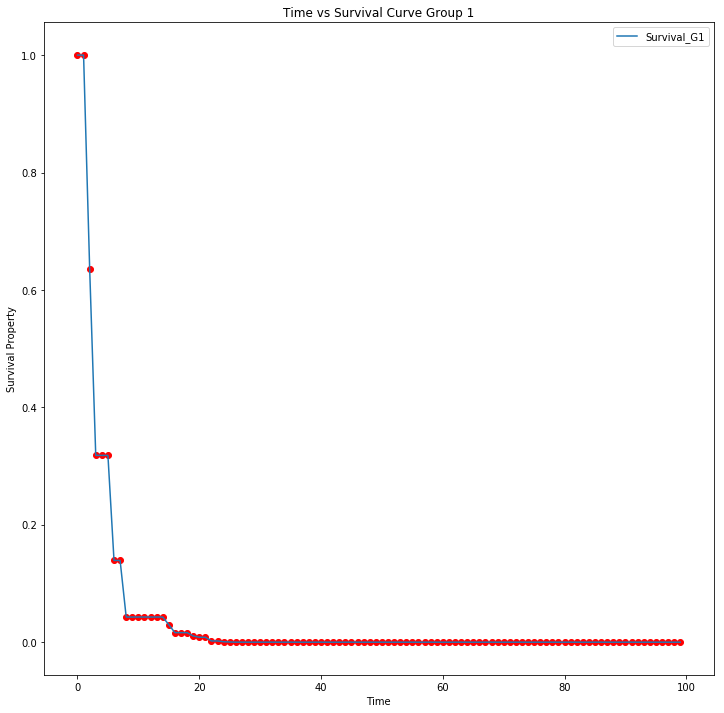

In [420]:
plt.figure(figsize=(12,12))
kmplot(table1['Time'],table1['Survival_G1'],title="Group 1")
plt.scatter(table1['Time'],table1['Survival_G1'],color='r')
# plt.plot([0,350],[0.5,0.5])
# plt.plot([266.5,266.5],[0.36,1])
# plt.scatter([266.5],[0.5],color='black')
# plt.text(266.8,0.503,"Median: 266.5")
# plt.legend('Median')

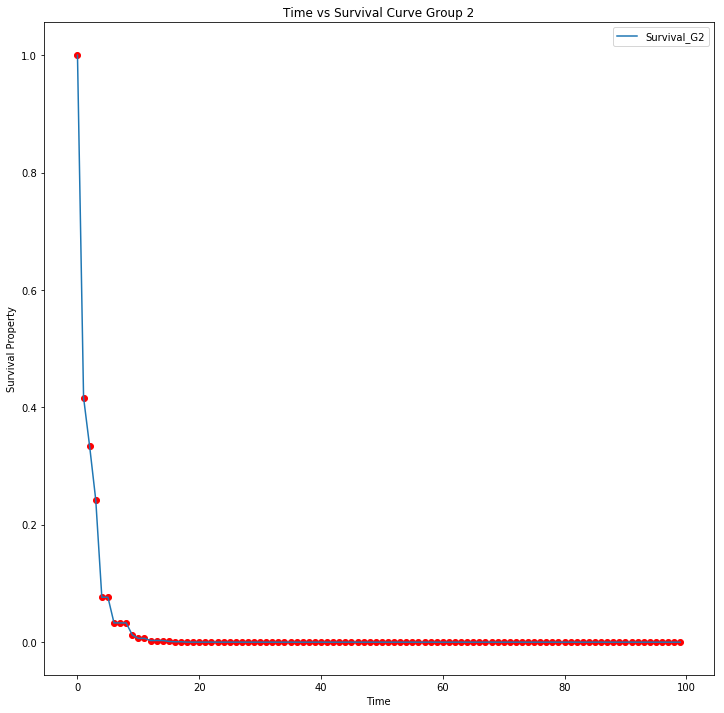

In [421]:
plt.figure(figsize=(12,12))
kmplot(table2['Time'],table2['Survival_G2'],title="Group 2")
plt.scatter(table2['Time'],table2['Survival_G2'],color='r')
# plt.plot([0,350],[0.5,0.5])
# plt.plot([278,278],[0.36,1])
# plt.text(278.7,0.503,"Median: 278")
# plt.scatter(278,0.5,color='black')

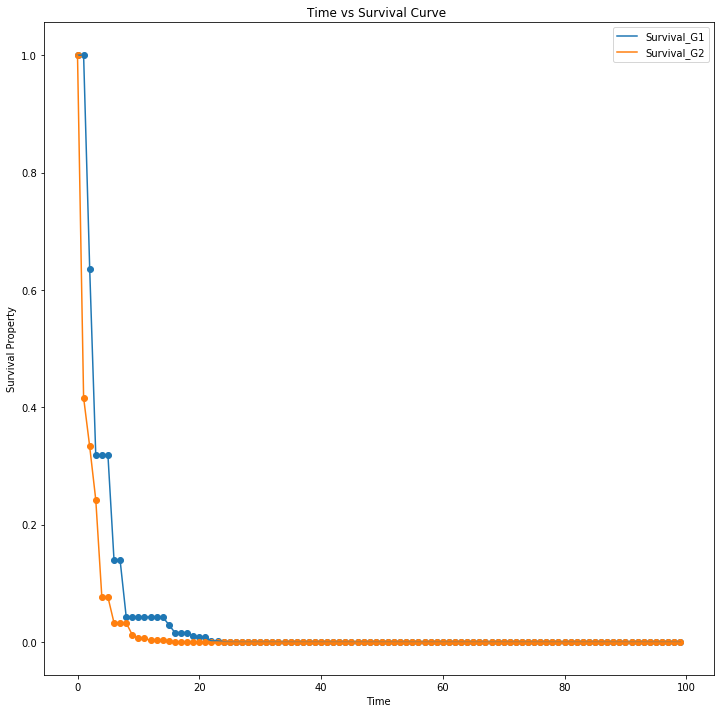

In [422]:
plt.figure(figsize=(12,12))
kmplot(table1['Time'],table1['Survival_G1'])

kmplot(table2['Time'],table2['Survival_G2'])
plt.scatter(table1['Time'],table1['Survival_G1'])
plt.scatter(table2['Time'],table2['Survival_G2'])

In [423]:
tmpppp = pd.DataFrame(table2)

In [425]:
tmpppp.to_csv("../../table2_1.csv",index=False)
tmpppp = pd.DataFrame(table1)
tmpppp.to_csv('../../table1_1.csv',index=False)